# Script 1 - Iowa Liquor Sales

In questo primo script si è analizzato in ottica descrittiva il dataset, Iowa Liquor Sales. Esso contiene informazioni riguardo l'attività di vendita di alcolici negli Stati Uniti ed in paricoalre nello stato dell' Iowa. Sono state effettuate dettagliate analisi descrittve, e come ulteriore obiettivo ci siamo prefissati di predire in quali codici postali sarebbe interessante aprire un negozio per massimizzare le vendite.  

# Import delle librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Read Data and ETL 

In [2]:
df = pd.read_csv("C:/Users/gigio/Downloads/Iowa_Liquor_Sales.csv", low_memory=False)


In [3]:
# df.head()
# df.describe()
# df.info()
df.isnull().sum() #vedo quanti valori NaN ci sono nel dataset

Invoice/Item Number            0
Date                           0
Store Number                   0
Store Name                     0
Address                    79927
City                       79926
Zip Code                   79971
Store Location           1927332
County Number             156731
County                    156729
Category                   16974
Category Name              25040
Vendor Number                  5
Vendor Name                    3
Item Number                    0
Item Description               0
Pack                           0
Bottle Volume (ml)             0
State Bottle Cost             10
State Bottle Retail           10
Bottles Sold                   0
Sale (Dollars)                10
Volume Sold (Liters)           0
Volume Sold (Gallons)          0
dtype: int64

In [3]:
#ETL per eliminare i valori nulli ed i duplicati
df.dropna(inplace=True)
df.drop_duplicates(inplace = True)
# df.shape
df.isnull().sum() #verifica che sono stati eliminati i valori nulli

Invoice/Item Number      0
Date                     0
Store Number             0
Store Name               0
Address                  0
City                     0
Zip Code                 0
Store Location           0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Vendor Name              0
Item Number              0
Item Description         0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [4]:
#ETL sulla data, divido nel formato desiderato e creo due colonne: mese ed anno
df.Date = pd.to_datetime(df["Date"], format = "%m/%d/%Y")
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [5]:
# Trasformo Item number in int64 
df[("Item Number")] = pd.to_numeric(df[("Item Number")], errors='coerce')
df[("Item Number")] = pd.to_numeric(df[("Item Number")], errors='coerce').fillna(0).astype(np.int64)

In [6]:
#IMPORTANTE PER ETL category name e Vendor name presentano il problema dei duplciati tra minuscolo e maiuscolo,
#che non si risolve con il semplice drop_duplicates, ma risolvo così:
df["Category Name"]=df["Category Name"].str.upper()
df['Vendor Name']=df['Vendor Name'].str.upper()

In [7]:
popolazione=pd.read_excel("C:/Users/gigio/Desktop/PROVE BACKUP/popolazione_fips.xlsx")

In [8]:
popolazione.head()

,State,Area_Name,year 2010,year 2011,year 2012,year 2013,year 2014,year 2015,year 2016,year 2017,year 2018,year 2019,FIPStxt
0,US,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,0
1,AL,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,1000
2,AL,Autauga County,54773,55227,54954,54727,54893,54864,55243,55390,55533,55869,1001
3,AL,Baldwin County,183112,186558,190145,194885,199183,202939,207601,212521,217855,223234,1003
4,AL,Barbour County,27327,27341,27169,26937,26755,26283,25806,25157,24872,24686,1005


In [9]:
popolazione_IA=popolazione[popolazione['State']=='IA']

In [10]:

popolazione_IA.drop([805], inplace=True)
popolazione_IA.head()

C:\Users\gigio\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,State,Area_Name,year 2010,year 2011,year 2012,year 2013,year 2014,year 2015,year 2016,year 2017,year 2018,year 2019,FIPStxt
806,IA,Adair County,7679,7546,7468,7387,7368,7145,7005,7051,7074,7152,19001
807,IA,Adams County,4023,3994,3910,3891,3877,3754,3692,3657,3644,3602,19003
808,IA,Allamakee County,14378,14222,14149,14071,14062,13874,13851,13803,13852,13687,19005
809,IA,Appanoose County,12856,12848,12707,12654,12671,12577,12505,12353,12401,12426,19007
810,IA,Audubon County,6098,6004,5865,5863,5771,5711,5626,5550,5471,5496,19009


In [11]:
Population_IA=popolazione_IA[['State', 'Area_Name', 'year 2019']]


In [12]:
Population_IA.head()

,State,Area_Name,year 2019
806,IA,Adair County,7152
807,IA,Adams County,3602
808,IA,Allamakee County,13687
809,IA,Appanoose County,12426
810,IA,Audubon County,5496


In [13]:
Population_IA['Area_Name'] = Population_IA['Area_Name'].map(lambda x: x.rstrip(' County')) 

C:\Users\gigio\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
Population_IA.head()

,State,Area_Name,year 2019
806,IA,Adair,7152
807,IA,Adams,3602
808,IA,Allamakee,13687
809,IA,Appanoose,12426
810,IA,Audub,5496


In [15]:
Population_IA['Area_Name']=Population_IA['Area_Name'].str.upper()

C:\Users\gigio\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
Population_IA.head()

,State,Area_Name,year 2019
806,IA,ADAIR,7152
807,IA,ADAMS,3602
808,IA,ALLAMAKEE,13687
809,IA,APPANOOSE,12426
810,IA,AUDUB,5496


In [17]:
Population_IA.shape

(99, 3)

In [18]:
Population_IA.rename(columns={'Area_Name':'County', 'FIPStxt': 'FIPS'},inplace=True)

C:\Users\gigio\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
Population_IA.rename(columns={'year 2019':'Population'},inplace=True)

In [20]:
Population_IA.head()
#ok, 99 contea. Ho raggruppato la popolazione per contea

,State,County,Population
806,IA,ADAIR,7152
807,IA,ADAMS,3602
808,IA,ALLAMAKEE,13687
809,IA,APPANOOSE,12426
810,IA,AUDUB,5496


In [7]:
df_2019=df[df['year']==2019] 
df_2019.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month,year
886836,INV-16840300172,2019-01-09,2621,Hy-Vee Food Store #3 / Sioux City,3301 Gordon Dr,Sioux City,51105,POINT (-96.364108 42.487752),97.0,WOODBURY,...,12,1000,7.67,11.51,2,23.02,2.00,0.52,1,2019
896194,INV-16839800075,2019-01-09,2594,Hy-Vee Food Store / Sioux City,4500 Sergeant Road,Sioux City,51106,POINT (-96.346969 42.447396),97.0,WOODBURY,...,12,750,15.74,23.61,1,23.61,0.75,0.19,1,2019
903678,INV-16840300157,2019-01-09,2621,Hy-Vee Food Store #3 / Sioux City,3301 Gordon Dr,Sioux City,51105,POINT (-96.364108 42.487752),97.0,WOODBURY,...,12,750,8.25,12.38,4,49.52,3.00,0.79,1,2019
906924,INV-16839300007,2019-01-09,4655,Casey's General Store #2237 / Prairie City,1002 W 2nd St,Prairie City,50228,POINT (-93.247591 41.596714),50.0,JASPER,...,12,750,10.33,15.50,3,46.50,2.25,0.59,1,2019
915910,INV-16836900016,2019-01-09,3949,Wal-Mart 0751 / Pella,1650 Washington St,Pella,50219,POINT (-92.933676 41.410379),63.0,MARION,...,6,1750,6.92,10.38,12,124.56,21.00,5.54,1,2019


In [22]:
tot_2019=pd.merge(df_2019,Population_IA , how='inner' , on='County') #ok

In [23]:
#creo un campo popolazione in 10K che mi servirà per dopo
tot_2019['Population in 10K'] = tot_2019['Population'].apply(lambda x:x/10000)

In [24]:
tot_2019.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month,year,State,Population,Population in 10K
0,INV-16839300007,2019-01-09,4655,Casey's General Store #2237 / Prairie City,1002 W 2nd St,Prairie City,50228,POINT (-93.247591 41.596714),50.0,JASPER,...,15.50,3,46.50,2.25,0.59,1,2019,IA,37185,3.7185
1,INV-16735300018,2019-01-04,2517,Hy-Vee Food Store #1 / Newton,1501 First Avenue East,Newton,50208,POINT (-93.034296 41.69916),50.0,JASPER,...,8.22,12,98.64,9.00,2.37,1,2019,IA,37185,3.7185
2,INV-16737100005,2019-01-04,4604,Pit Stop Liquors / Newton,"1324, 1st Ave E",Newton,50208,POINT (-93.035654 41.699173),50.0,JASPER,...,18.68,1,18.68,0.50,0.13,1,2019,IA,37185,3.7185
3,INV-16735300020,2019-01-04,2517,Hy-Vee Food Store #1 / Newton,1501 First Avenue East,Newton,50208,POINT (-93.034296 41.69916),50.0,JASPER,...,5.06,12,60.72,9.00,2.37,1,2019,IA,37185,3.7185
4,INV-16735300043,2019-01-04,2517,Hy-Vee Food Store #1 / Newton,1501 First Avenue East,Newton,50208,POINT (-93.034296 41.69916),50.0,JASPER,...,7.20,12,86.40,6.00,1.58,1,2019,IA,37185,3.7185


# Descriptive analysis (overall)

In [25]:
#run, creo nuova colonna con i profitti
df['State profit per bottle'] = df['State Bottle Retail'] - df['State Bottle Cost']

In [26]:

stores= df.groupby('Store Number',as_index=False)[['State Bottle Retail','Bottles Sold', 'State profit per bottle']].mean()
print(stores)


      Store Number  State Bottle Retail  Bottles Sold  State profit per bottle
0             2106            16.007238     19.165077                 5.342139
1             2113            15.665237      4.403961                 5.230438
2             2130            15.884311     19.273862                 5.299980
3             2132            15.070841      7.721495                 5.048897
4             2152            12.689808      4.712957                 4.252735
...            ...                  ...           ...                      ...
2342          9931            21.000000      2.200000                 7.000000
2343          9934            28.880000      1.000000                 9.630000
2344          9937            26.250000      2.000000                 8.750000
2345          9938            41.120000     49.000000                13.710000
2346          9946            22.500000     96.000000                 7.500000

[2347 rows x 4 columns]


13.784528583236629


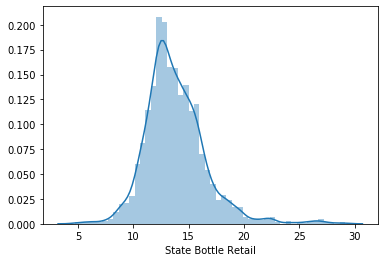

In [27]:
#Prezzo medio delle bottiglie: alcuni negozi vendono solo bottiglie "costose" o "economiche", 
#ma la maggior parte si colloca intorno alla media
print(stores[stores['State Bottle Retail']<30]['State Bottle Retail'].mean())
sns.distplot(stores[stores['State Bottle Retail']<30]['State Bottle Retail']);

In [28]:
# Quanti outlier abbiamo? appena 12
print(len(stores))
print(len(stores[stores['State Bottle Retail']>=30]))

2347
12


In [29]:
# escludiamo questi due outliers da stores:
stores=stores[stores['State Bottle Retail']<30]
len(stores)

2335

10.625627212916767


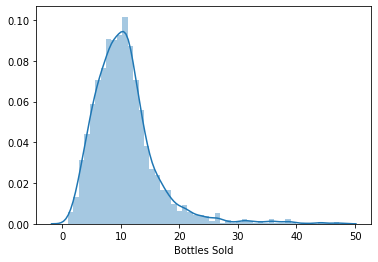

In [30]:
#Una volta che si escludono i negozi all'ingrosso (ci sono alcuni outlier), la maggior parte dei negozi di acquistare circa 10 bottiglie in un ordine 
print(stores[stores['Bottles Sold']<50]['Bottles Sold'].mean())
sns.distplot(stores[stores['Bottles Sold']<50]['Bottles Sold']);

In [31]:
# Quanti outlier abbiamo? appena 10.
print(len(stores))
print(len(stores[stores['Bottles Sold']>=50]))

2335
10


In [32]:
# escludiamo i 10 outlier da stores:
stores=stores[stores['Bottles Sold']<50]
len(stores)

2325

4.591678437398028


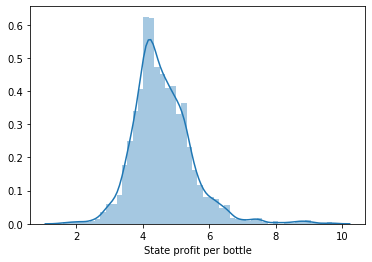

In [33]:
#analizzo il profitto medio per bottiglia da parte dello stato
print(stores[stores['State profit per bottle']<12]['State profit per bottle'].mean())
sns.distplot(stores[stores['State profit per bottle']<12]['State profit per bottle']);

In [34]:
#quanti outlier abbiamo? appena 9
print(len(stores))
print(len(stores[stores['State profit per bottle']>=12]))

2325
0


In [35]:
stores=stores[stores['State profit per bottle']<12]
len(stores)

2325

Vendor Name
DIAGEO AMERICAS                     29544585
JIM BEAM BRANDS                     13778927
SAZERAC COMPANY  INC                13590677
SAZERAC NORTH AMERICA               10640903
LUXCO-ST LOUIS                      10074553
LUXCO INC                            8460974
HEAVEN HILL BRANDS                   7243152
CONSTELLATION WINE COMPANY, INC.     7220819
CONSTELLATION BRANDS INC             6396479
PROXIMO                              5643107
Name: Bottles Sold, dtype: int64


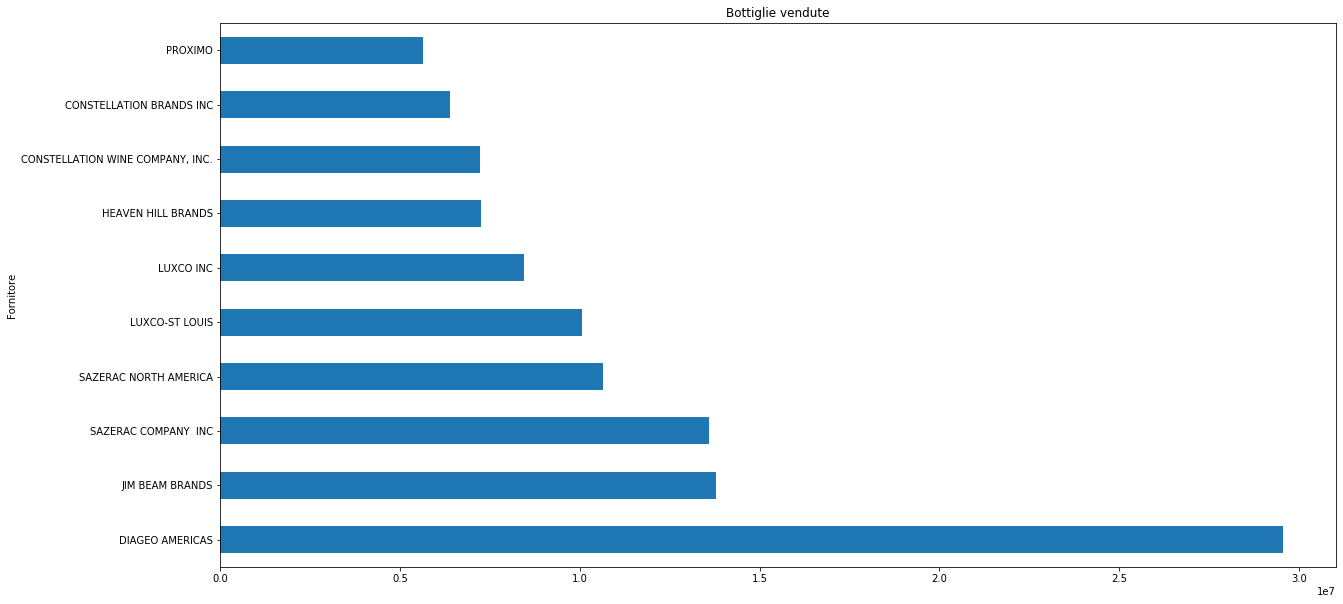

In [36]:
#raggruppo per venditore e bottiglie vendute --> posso capire i maggiori venditori
print(df.groupby('Vendor Name')['Bottles Sold'].sum().sort_values(ascending=False).head(10))
df.groupby('Vendor Name')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.ylabel('Fornitore')
plt.title('Bottiglie vendute')
plt.show()
#run

Item Description
Black Velvet                     9323974
Hawkeye Vodka                    6586737
Fireball Cinnamon Whiskey        5794291
Captain Morgan Spiced Rum        3833135
Titos Handmade Vodka             3533626
Fireball Cinnamon                3350273
Five O'clock Vodka               3302895
Barton Vodka                     2744123
Mccormick Vodka Pet              2716392
Jack Daniels Old #7 Black Lbl    2367264
Name: Bottles Sold, dtype: int64


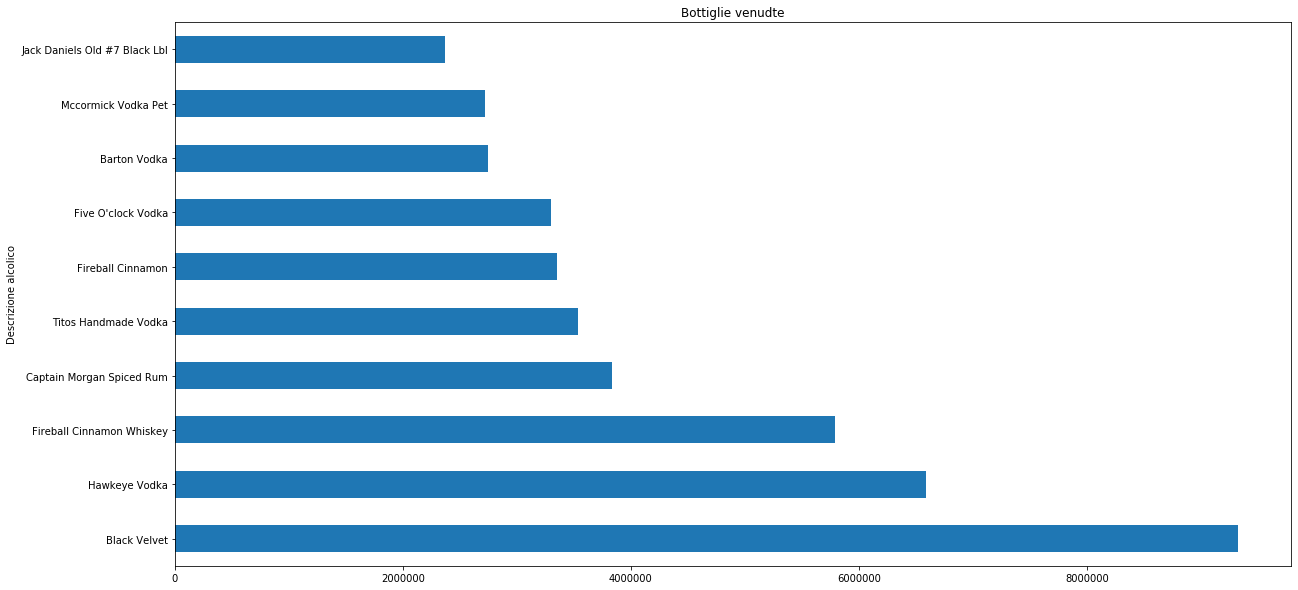

In [37]:
#raggruppo per tipo di alcolico e bottiglie vendute --> posso capire quale alcolico è il più preferito
print(df.groupby('Item Description')['Bottles Sold'].sum().sort_values(ascending=False).head(10))
df.groupby('Item Description')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.ylabel('Descrizione alcolico')
plt.title('Bottiglie venudte')
plt.show()

Item Description
Black Velvet                     9.957747e+07
Titos Handmade Vodka             6.779863e+07
Captain Morgan Spiced Rum        6.764921e+07
Jack Daniels Old #7 Black Lbl    6.116725e+07
Fireball Cinnamon Whiskey        5.469678e+07
Hawkeye Vodka                    4.575180e+07
Crown Royal Canadian Whisky      4.182745e+07
Crown Royal                      4.140080e+07
Jameson                          3.509882e+07
Jagermeister Liqueur             3.272463e+07
Name: Sale (Dollars), dtype: float64


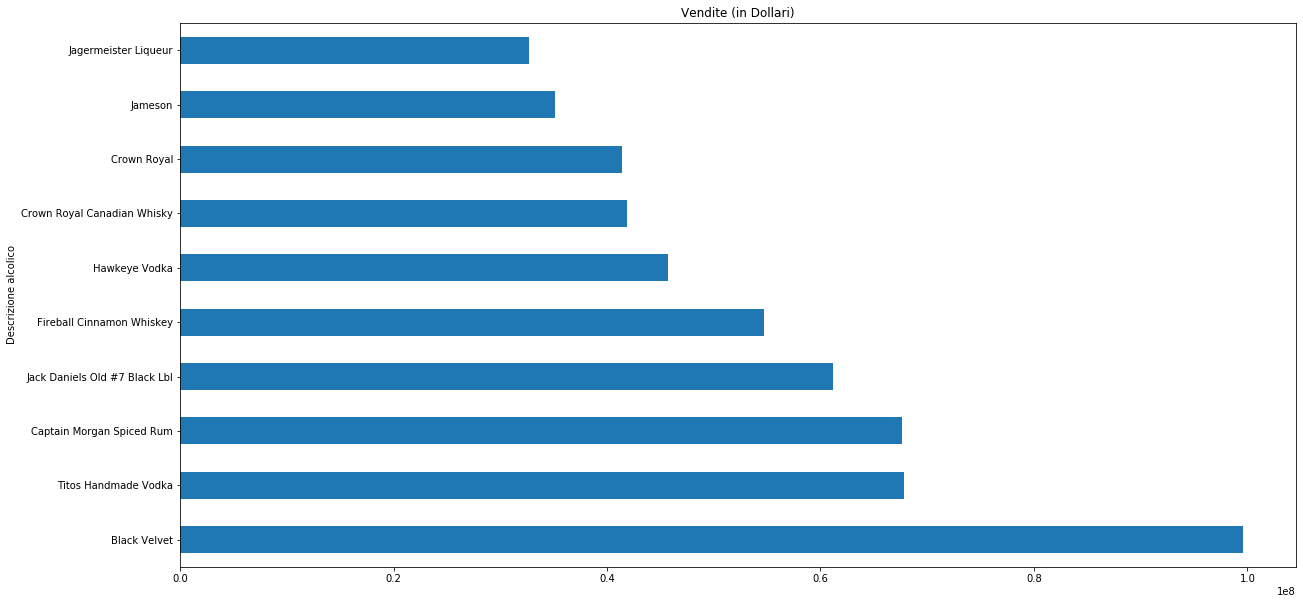

In [38]:
#raggruppo per tipo di alcolico e le vendite (in dollari) --> posso capire l'alcolico più venduto
print(df.groupby('Item Description')['Sale (Dollars)'].sum().sort_values(ascending=False).head(10))
df.groupby('Item Description')['Sale (Dollars)'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.ylabel('Descrizione alcolico')
plt.title('Vendite (in Dollari)')
plt.show()

Category Name
CANADIAN WHISKIES            2.993325e+08
AMERICAN VODKAS              1.929758e+08
SPICED RUM                   1.763593e+08
STRAIGHT BOURBON WHISKIES    1.476169e+08
VODKA 80 PROOF               1.318597e+08
WHISKEY LIQUEUR              1.203331e+08
TENNESSEE WHISKIES           1.081594e+08
IMPORTED VODKA               7.112923e+07
BLENDED WHISKIES             7.023893e+07
IMPORTED VODKAS              6.294253e+07
Name: Sale (Dollars), dtype: float64


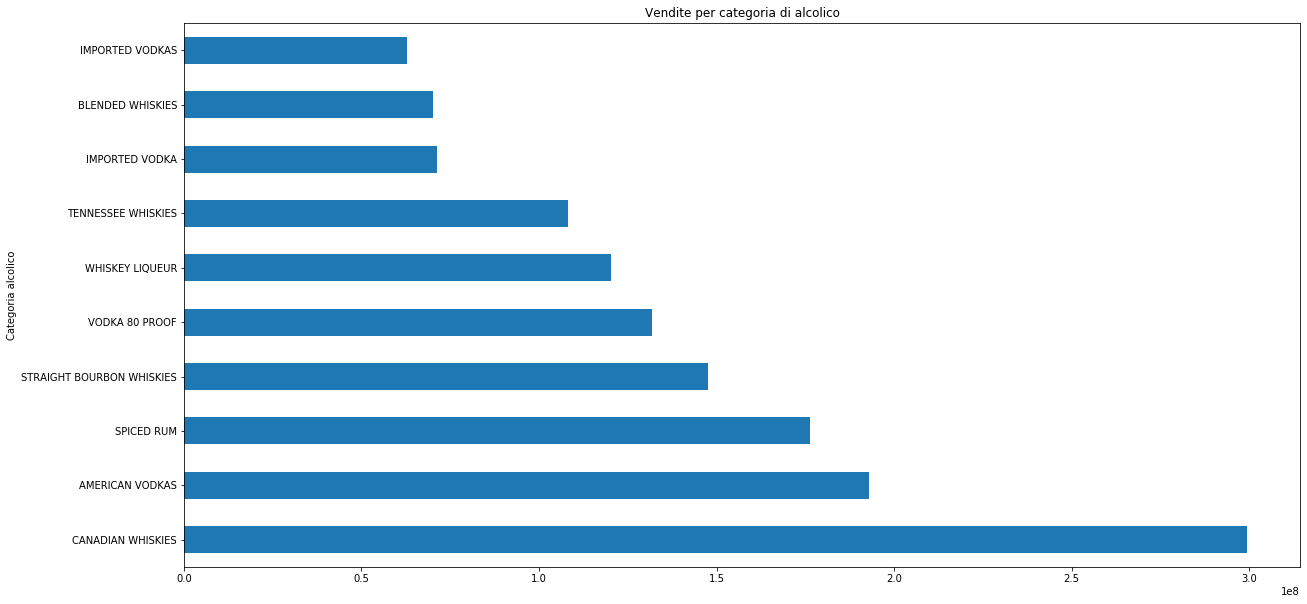

In [39]:
#raggruppo per categoria di alcolico e le vendite (in dollari) --> posso capire l'alcolico più venduto
print(df.groupby('Category Name')['Sale (Dollars)'].sum().sort_values(ascending=False).head(10))
df.groupby('Category Name')['Sale (Dollars)'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.ylabel('Categoria alcolico')
plt.title('Vendite per categoria di alcolico')
plt.show()

(0, 350)

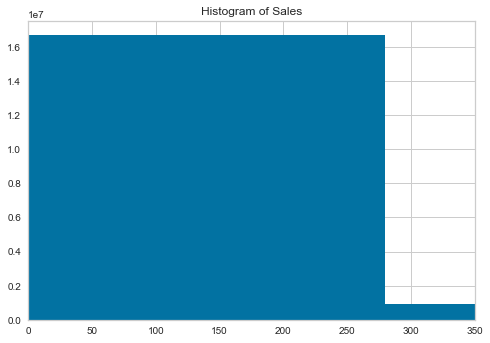

In [96]:
#Istogramma delle vendite
plt.hist(df['Sale (Dollars)'], bins=1000)
plt.xlabel=('Sale ($)')
plt.ylabel=('Frequency')
plt.title('Histogram of Sales')
plt.xlim([0,350])


(0, 350)

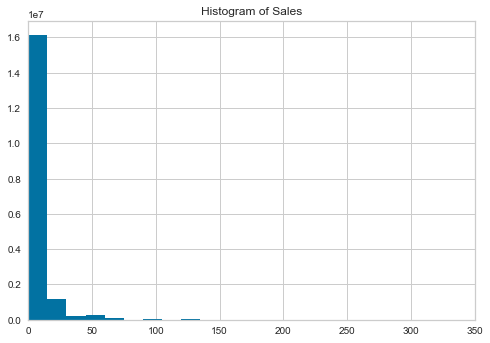

In [97]:
#Istogramma delle vendite
plt.hist(df['Bottles Sold'], bins=1000)
plt.xlabel=('Bottiglie vendute')
plt.ylabel=('Frequency')
plt.title('Histogram of Sales')
plt.xlim([0,350])

# Descriptive analysis (year 2019)

In [40]:
tot_2019['Profit_per_sale'] = ((tot_2019['State Bottle Retail'] - tot_2019['State Bottle Cost'])*tot_2019['State Bottle Cost'])*1.18
tot_2019.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month,year,State,Population,Population in 10K,Profit_per_sale
0,INV-16839300007,2019-01-09,4655,Casey's General Store #2237 / Prairie City,1002 W 2nd St,Prairie City,50228,POINT (-93.247591 41.596714),50.0,JASPER,...,3,46.50,2.25,0.59,1,2019,IA,37185,3.7185,63.019198
1,INV-16735300018,2019-01-04,2517,Hy-Vee Food Store #1 / Newton,1501 First Avenue East,Newton,50208,POINT (-93.034296 41.69916),50.0,JASPER,...,12,98.64,9.00,2.37,1,2019,IA,37185,3.7185,17.717936
2,INV-16737100005,2019-01-04,4604,Pit Stop Liquors / Newton,"1324, 1st Ave E",Newton,50208,POINT (-93.035654 41.699173),50.0,JASPER,...,1,18.68,0.50,0.13,1,2019,IA,37185,3.7185,91.524930
3,INV-16735300020,2019-01-04,2517,Hy-Vee Food Store #1 / Newton,1501 First Avenue East,Newton,50208,POINT (-93.034296 41.69916),50.0,JASPER,...,12,60.72,9.00,2.37,1,2019,IA,37185,3.7185,6.720454
4,INV-16735300043,2019-01-04,2517,Hy-Vee Food Store #1 / Newton,1501 First Avenue East,Newton,50208,POINT (-93.034296 41.69916),50.0,JASPER,...,12,86.40,6.00,1.58,1,2019,IA,37185,3.7185,13.593600


In [41]:
# aggiungo l'anno per far matchare poi la popolazione. 
stores_2019= tot_2019.groupby('Store Number',as_index=False)[['State Bottle Retail','Bottles Sold', 'Population', 'Population in 10K', 'Volume Sold (Liters)']].mean()
print(stores_2019)


     Store Number  State Bottle Retail  Bottles Sold  Population  \
0            2106            16.652938     19.263920    131228.0   
1            2113            16.270658      3.753722     35904.0   
2            2130            17.425406     20.012935    131228.0   
3            2178            16.551887      9.085278     13687.0   
4            2190            22.603088      8.408258    490161.0   
..            ...                  ...           ...         ...   
856          9023            56.250000     10.500000     20165.0   
857          9037            26.328125     15.750000     33657.0   
858          9038            37.700000    990.000000     20165.0   
859          9039            15.005455    125.090909    490161.0   
860          9041            25.796369     12.678571     14813.0   

     Population in 10K  Volume Sold (Liters)  
0              13.1228             17.851560  
1               3.5904              3.469175  
2              13.1228             18.3877

In [42]:
x=tot_2019['Profit_per_sale'].groupby(tot_2019['Store Number']).sum()
print(len(x))
profit=pd.DataFrame(x);

861


In [43]:
profit.reset_index(level=0, inplace=True)
profit.head()

,Store Number,Profit_per_sale
0,2106,4.762394e+05
1,2113,1.533957e+05
2,2130,4.021997e+05
3,2178,2.523608e+05
4,2190,4.047641e+06


In [44]:
stores_tot=pd.merge(stores_2019, profit, on='Store Number')

In [45]:
stores_tot.head()

,Store Number,State Bottle Retail,Bottles Sold,Population,Population in 10K,Volume Sold (Liters),Profit_per_sale
0,2106,16.652938,19.263920,131228.0,13.1228,17.851560,4.762394e+05
1,2113,16.270658,3.753722,35904.0,3.5904,3.469175,1.533957e+05
2,2130,17.425406,20.012935,131228.0,13.1228,18.387712,4.021997e+05
3,2178,16.551887,9.085278,13687.0,1.3687,9.401947,2.523608e+05
4,2190,22.603088,8.408258,490161.0,49.0161,5.494724,4.047641e+06


14.230290862094076


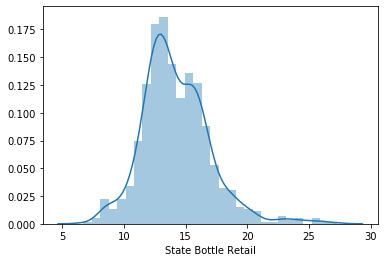

In [46]:
print(stores_tot[stores_tot['State Bottle Retail']<30]['State Bottle Retail'].mean())
sns.distplot(stores_tot[stores_tot['State Bottle Retail']<30]['State Bottle Retail']);

In [47]:
print(len(stores_tot))
print(len(stores_tot[stores_tot['State Bottle Retail']>=30]))

861
2


In [48]:
stores_tot=stores_tot[stores_tot['State Bottle Retail']<30]
len(stores_tot)

859

10.992871015441786


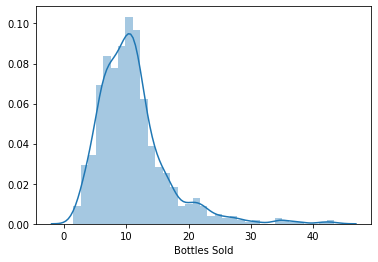

In [49]:
#Una volta che si escludono i negozi all'ingrosso (ci sono alcuni outlier), la maggior parte dei negozi di acquistare circa 11 bottiglie in un ordine 
print(stores_tot[stores_tot['Bottles Sold']<50]['Bottles Sold'].mean())
sns.distplot(stores_tot[stores_tot['Bottles Sold']<50]['Bottles Sold']);

In [50]:
print(len(stores_tot))
print(len(stores_tot[stores_tot['Bottles Sold']>=50]))

859
2


In [51]:
stores_tot=stores_tot[stores_tot['Bottles Sold']<50]
len(stores_tot)

857

64808.56502731532


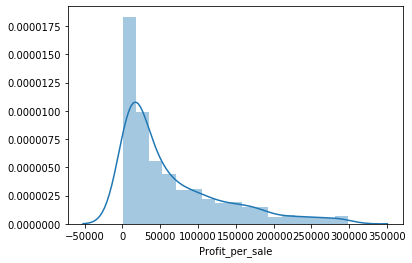

In [52]:
## Qual è il profitto annuo della maggior parte dei negozi per l'anno 2019, una volta esclusi gli outlier? Circa 64.000 dollari all'anno.
print(stores_tot[stores_tot['Profit_per_sale']<300000]['Profit_per_sale'].mean())
sns.distplot(stores_tot[stores_tot['Profit_per_sale']<300000]['Profit_per_sale']);

In [53]:
print(len(stores_tot))
print(len(stores_tot[stores_tot['Profit_per_sale']>=300000]))

857
83


In [54]:
stores_tot=stores_tot[stores_tot['Profit_per_sale']<300000]
len(stores_tot)

774

**Populatuion and profit**

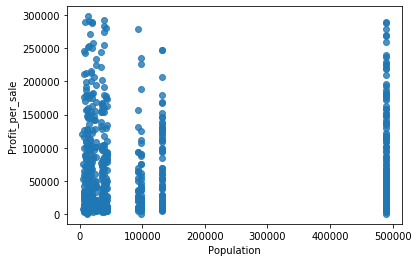

In [55]:
sns.regplot(x=stores_tot['Population'], y=stores_tot['Profit_per_sale'], fit_reg=False)

In [56]:
bins = [0, 30000, 50000, 70000, 100000, 200000, 300000, 500000]
stores2=stores_tot
stores2['pop_bins'] = pd.cut(stores2['Population'], bins)

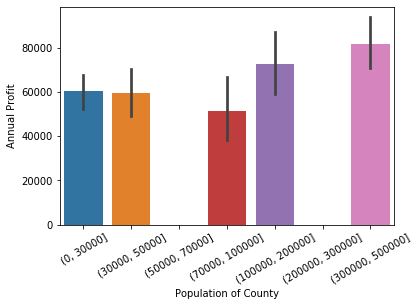

In [57]:
ax = sns.barplot(x=stores2['pop_bins'], y=stores2['Profit_per_sale'])
ax.set(xlabel='Population of County', ylabel='Annual Profit')
labels = ax.get_xticklabels() # get x labels
ax.set_xticklabels(labels, rotation=30)
plt.show()

**Bottles by order**

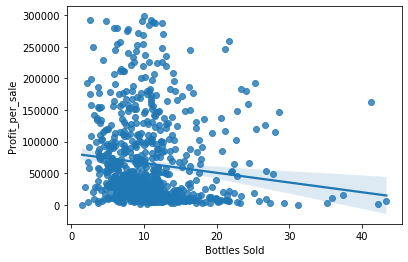

In [58]:
# I negozi con un alto profitto annuale hanno di solito un numero medio di bottiglie per vendita.
sns.regplot(x=stores_tot['Bottles Sold'], y=stores_tot['Profit_per_sale'])

In [59]:
bins = [0, 10, 20, 30, 40, 50]
stores2=stores_tot
stores2['bottles_bins'] = pd.cut(stores2['Bottles Sold'], bins)

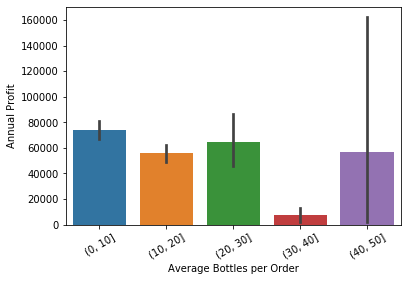

In [60]:
ax = sns.barplot(x=stores2['bottles_bins'], y=stores2['Profit_per_sale'])
ax.set(xlabel='Average Bottles per Order', ylabel='Annual Profit')
labels = ax.get_xticklabels() # get x labels
ax.set_xticklabels(labels, rotation=30)
plt.show()

**Average bottle price per order**

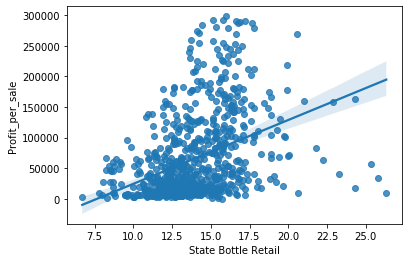

In [61]:
# I negozi che vendono per lo più bottiglie ad altissimo prezzo non hanno un alto profitto annuale.
sns.regplot(x=stores_tot['State Bottle Retail'], y=stores_tot['Profit_per_sale'], fit_reg=True)

In [62]:
bins = [5, 10, 15, 20, 25, 30]
stores2=stores_tot
stores2['price_bins'] = pd.cut(stores2['State Bottle Retail'], bins)

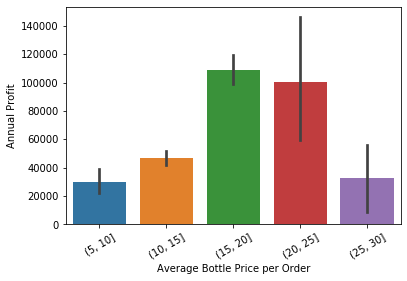

In [63]:
ax = sns.barplot(x=stores2['price_bins'], y=stores2['Profit_per_sale'])
ax.set(xlabel='Average Bottle Price per Order', ylabel='Annual Profit')
labels = ax.get_xticklabels() # get x labels
ax.set_xticklabels(labels, rotation=30)
plt.show()

# Clustering 
Applicazione del clustering sui dati relativi all'anno 2019

In [8]:
df_2019['Bottle Volume (ml)']= df['Bottle Volume (ml)'].astype(int)
df_2019['Bottle Volume (cl)'] = df_2019['Bottle Volume (ml)'].apply(lambda x: x/10) 

C:\Users\gigio\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gigio\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
#operazioni di filtraggio
df_senzaout = (df_2019['State Bottle Retail']<30) & (df_2019['Bottles Sold']<50) & (df_2019['Sale (Dollars)']<130)

In [10]:
df2019_nout = df_2019[df_senzaout]

In [11]:
df2019_nout.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month,year,Bottle Volume (cl)
886836,INV-16840300172,2019-01-09,2621,Hy-Vee Food Store #3 / Sioux City,3301 Gordon Dr,Sioux City,51105,POINT (-96.364108 42.487752),97.0,WOODBURY,...,1000,7.67,11.51,2,23.02,2.00,0.52,1,2019,100.0
896194,INV-16839800075,2019-01-09,2594,Hy-Vee Food Store / Sioux City,4500 Sergeant Road,Sioux City,51106,POINT (-96.346969 42.447396),97.0,WOODBURY,...,750,15.74,23.61,1,23.61,0.75,0.19,1,2019,75.0
903678,INV-16840300157,2019-01-09,2621,Hy-Vee Food Store #3 / Sioux City,3301 Gordon Dr,Sioux City,51105,POINT (-96.364108 42.487752),97.0,WOODBURY,...,750,8.25,12.38,4,49.52,3.00,0.79,1,2019,75.0
906924,INV-16839300007,2019-01-09,4655,Casey's General Store #2237 / Prairie City,1002 W 2nd St,Prairie City,50228,POINT (-93.247591 41.596714),50.0,JASPER,...,750,10.33,15.50,3,46.50,2.25,0.59,1,2019,75.0
915910,INV-16836900016,2019-01-09,3949,Wal-Mart 0751 / Pella,1650 Washington St,Pella,50219,POINT (-92.933676 41.410379),63.0,MARION,...,1750,6.92,10.38,12,124.56,21.00,5.54,1,2019,175.0


In [12]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# 1° cluster

In [69]:
#metto in relazione il prezzo al dettaglio e le bottiglie vendute

x=df2019_nout[['State Bottle Retail', 'Bottles Sold']].values
print(x.shape)

(1409601, 2)


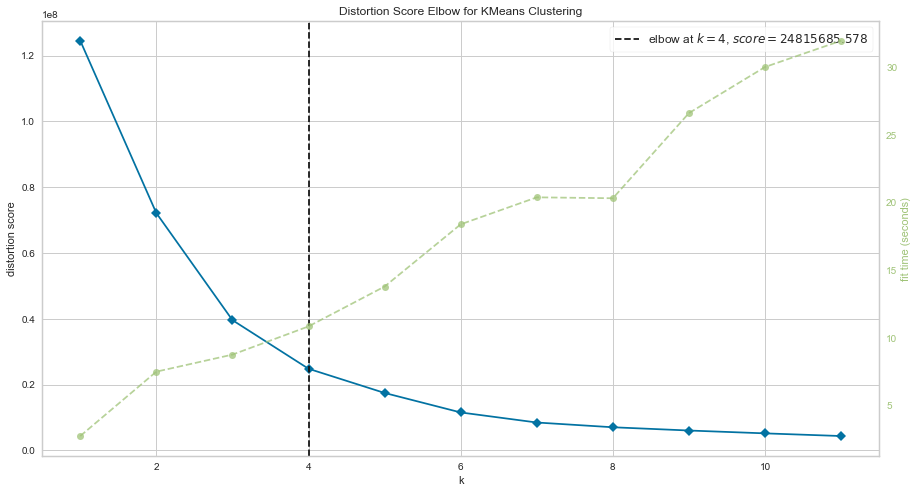

In [73]:
# wcss = []
# for i in range(1, 11):
#     km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
#     km.fit(x)
#     wcss.append(km.inertia_)
# plt.figure(figsize=(20,10))
# plt.plot(range(1,11), wcss)
# plt.title("The elbow mwthod", fontsize= 20)
# plt.xlabel("Numero di cluster")
# plt.ylabel("wcss")

from yellowbrick.cluster import KElbowVisualizer

model= KMeans()
visualizer= KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)
visualizer.show();

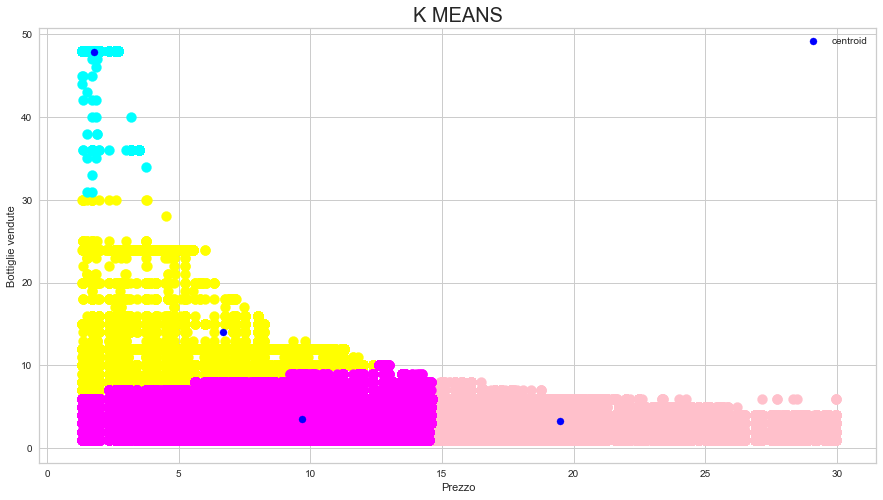

In [74]:
km= KMeans(n_clusters = 4, init='k-means++', max_iter=300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c= 'yellow')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c= 'pink')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c= 'magenta')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=100, c= 'cyan')
# plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=100, c= 'orange')
# plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s=100, c= 'red')
# plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=100, c= 'red')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50, c='blue', label= 'centroid')

plt.title("K MEANS", fontsize=20)
plt.xlabel("Prezzo")
plt.ylabel("Bottiglie vendute") 
plt.legend()
plt.show()

# 2° cluster

In [26]:
#metto in relazione le bottigle vendute con i rispettivi quantitativi di volume

x=df2019_nout[['Bottle Volume (ml)', 'Bottles Sold']].values
print(x.shape)

(1409601, 2)


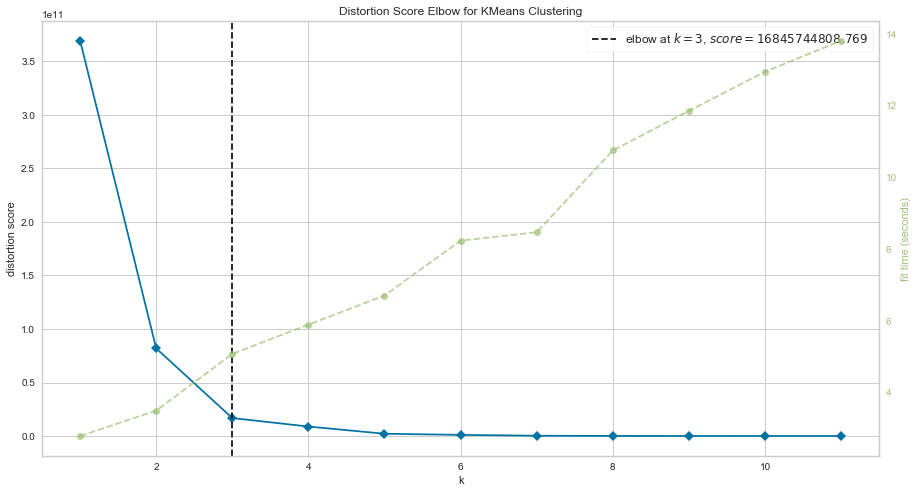

In [79]:
# wcss = []
# for i in range(1, 11):
#     km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
#     km.fit(x)
#     wcss.append(km.inertia_)
# plt.figure(figsize=(20,10))
# plt.plot(range(1,11), wcss)
# plt.title("The elbow mwthod", fontsize= 20)
# plt.xlabel("Numero di cluster")
# plt.ylabel("wcss")

from yellowbrick.cluster import KElbowVisualizer

model= KMeans()
visualizer= KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)
visualizer.show();

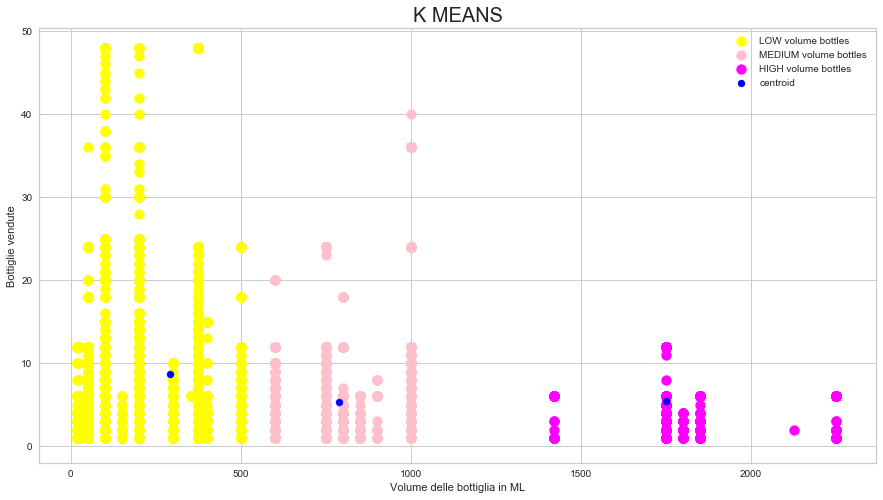

In [27]:
km= KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c= 'yellow', label= 'LOW volume bottles')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c= 'pink', label = 'MEDIUM volume bottles')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c= 'magenta', label= 'HIGH volume bottles')
# plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=100, c= 'cyan')
# plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=100, c= 'orange')
# plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s=100, c= 'red')
# plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=100, c= 'red')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50, c='blue', label= 'centroid')

plt.title("K MEANS", fontsize=20)
plt.xlabel("Volume delle bottiglia in ML")
plt.ylabel("Bottiglie vendute") 
plt.legend()
plt.show()

# 3° cluster 
Simile al 2° ma relativo al solo alcolico BLACK VELVET

In [13]:
Only_Black_Velvet = df2019_nout['Item Description'] == 'Black Velvet'

In [14]:
df2019_Black_Velvet= df2019_nout[Only_Black_Velvet]

In [28]:

x=df2019_Black_Velvet[['Bottle Volume (cl)', 'Bottles Sold']].values

In [29]:
print(x.shape)

(42260, 2)


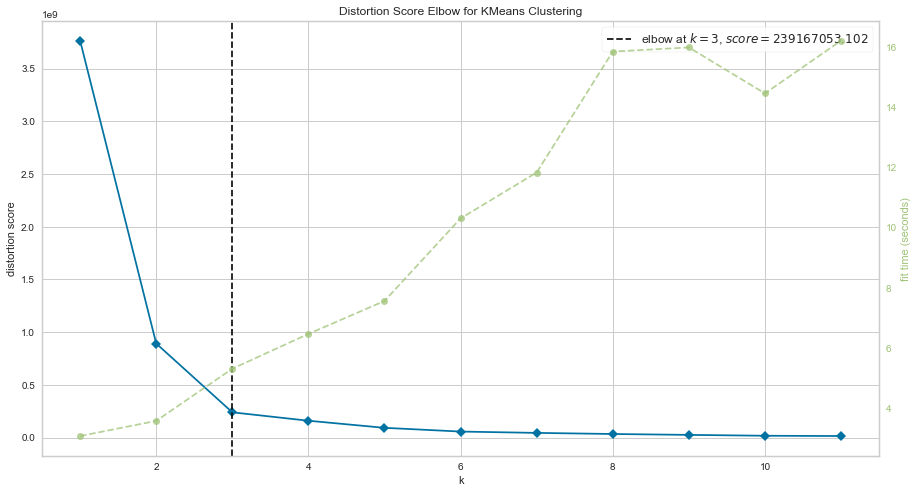

In [16]:
from yellowbrick.cluster import KElbowVisualizer

model= KMeans()
visualizer= KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)
visualizer.show();

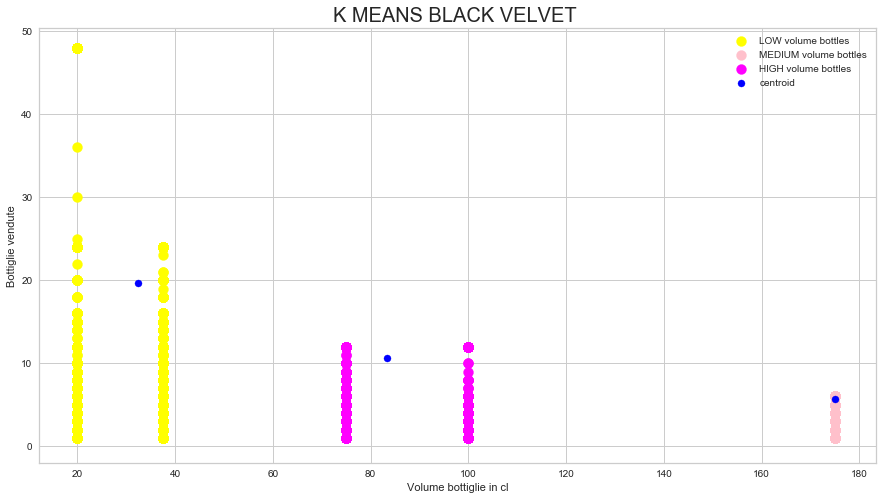

In [30]:
km= KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c= 'yellow', label= 'LOW volume bottles')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c= 'pink', label= 'MEDIUM volume bottles')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c= 'magenta', label= 'HIGH volume bottles')
# plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=100, c= 'cyan')
# plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=100, c= 'orange')
# plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s=100, c= 'red')
# plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=100, c= 'red')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50, c='blue', label= 'centroid')

plt.title("K MEANS BLACK VELVET ", fontsize=20)
plt.xlabel("Volume bottiglie in cl")
plt.ylabel("Bottiglie vendute") 
plt.legend()
plt.show()

#### Fine clustering

Di seguito pre processing prima della creazione del modello

In [98]:
#creo nuova colonna con i profitti
df['State profit per bottle'] = df['State Bottle Retail'] - df['State Bottle Cost']
# df.head()


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month,year,State profit per bottle
0,INV-00020100009,2016-08-29,4256,Fareway Stores #912 / Sioux Center,115 1st Ave NW,Sioux Center,51250,POINT (-96.176959 43.078003),84.0,SIOUX,...,750,8.66,12.99,6,12.99,4.50,1.18,8,2016,4.33
1,INV-00067000040,2016-08-31,4588,Sam's Mini Mart / Sioux City,923 W 7TH ST,Sioux City,51103,POINT (-96.419074 42.503495),97.0,WOODBURY,...,375,2.74,4.11,1,98.64,0.37,0.09,8,2016,1.37
3,INV-00030600017,2016-08-30,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 Blairs Ferry Road NE,Cedar Rapids,52402,POINT (-91.668909 42.034799),57.0,LINN,...,750,32.48,48.72,3,48.72,2.25,0.59,8,2016,16.24
4,S33682700006,2016-08-01,4967,Jeff's Market / Blue Grass,"102, W Mayne St",Blue Grass,52726,POINT (-90.766126 41.509119),82.0,Scott,...,600,7.12,10.68,1,10.68,0.60,0.16,8,2016,3.56
5,INV-00025700015,2016-08-30,4829,Central City 2,1501 Michigan Ave,Des Moines,50314,POINT (-93.613739 41.60572),77.0,POLK,...,750,8.26,12.39,1,148.68,0.75,0.19,8,2016,4.13


In [99]:
#Realizzo dataframe per codici di avviamento postale (zip code)


zcode_table = df[['Store Number', 'Zip Code', 'Sale (Dollars)', 'State Bottle Retail',
                         'State profit per bottle', 'Bottles Sold', 'Volume Sold (Liters)',
                        ]]
zcode_table.head()

,Store Number,Zip Code,Sale (Dollars),State Bottle Retail,State profit per bottle,Bottles Sold,Volume Sold (Liters)
0,4256,51250,12.99,12.99,4.33,6,4.50
1,4588,51103,98.64,4.11,1.37,1,0.37
3,2605,52402,48.72,48.72,16.24,3,2.25
4,4967,52726,10.68,10.68,3.56,1,0.60
5,4829,50314,148.68,12.39,4.13,1,0.75


**Costruzione dataframe da usare per il modello**

In [100]:
sales_by_zip = zcode_table.groupby('Zip Code')['Sale (Dollars)'].sum().to_frame().sort_values('Sale (Dollars)', ascending=0)

#resetto l'indice
sales_by_zip['Zip Code'] = sales_by_zip.index

In [101]:
# creao un indice di intervallo 0 - lunghezza del dataframe sales_by_zip
sales_by_zip.index = range(0, len(sales_by_zip))

In [102]:
print(sales_by_zip.shape) #zip code in cui si è venuduto di più
sales_by_zip.head()

(482, 2)


,Sale (Dollars),Zip Code
0,9.944311e+07,50314
1,9.353735e+07,50320
2,8.023740e+07,52402
3,7.103721e+07,52240
4,6.203393e+07,50266


In [103]:
#formo un nuovo dataframe sul volume distribuito per zip code
volume_by_zip = zcode_table.groupby('Zip Code')['Volume Sold (Liters)'].sum().to_frame()
volume_by_zip['Zip Code'] = volume_by_zip.index
volume_by_zip.index = range(0, len(volume_by_zip))
volume_by_zip.head()

,Volume Sold (Liters),Zip Code
0,28736.61,50002
1,267717.28,50003
2,6604.65,50005
3,61988.17,50006
4,499.53,50008


In [104]:
# dataframe bottleprofit_per_zip
bottleprofit_per_zip = zcode_table.groupby('Zip Code')['State profit per bottle'].sum().to_frame()
bottleprofit_per_zip['Zip Code'] = bottleprofit_per_zip.index
bottleprofit_per_zip.index = range(0, len(bottleprofit_per_zip))
bottleprofit_per_zip.head()

,State profit per bottle,Zip Code
0,19388.56,50002
1,110359.09,50003
2,2846.46,50005
3,47808.26,50006
4,3710.10,50008


Formulando nuovamente i dataframe raggruppati per codice di avviamento postale, calcolo il numero di negozi all'interno di ogni codice di avviamento postale

In [105]:
stores_by_zip = df.groupby('Zip Code')['Store Number'].nunique().to_frame().sort_values('Store Number', ascending=False)
stores_by_zip['Zip Code'] = stores_by_zip.index
stores_by_zip.index = range(0, len(stores_by_zip))
stores_by_zip.head()

,Store Number,Zip Code
0,44,52402
1,40,52404
2,40,51501
3,35,52001
4,34,52240


In [106]:
bottles_by_zip = df.groupby('Zip Code')['Bottles Sold'].sum().to_frame().sort_values('Bottles Sold', ascending=False)
bottles_by_zip['Zip Code'] = bottles_by_zip.index
bottles_by_zip.index = range(0, len(stores_by_zip))
bottles_by_zip.head()

,Bottles Sold,Zip Code
0,6366175,50314
1,6127576,52402
2,5948940,50320
3,5293369,52240
4,4526042,51501


In [107]:
#rinomino la colonna
stores_by_zip.rename(columns={'Store Number' : 'Number of Stores Per Zip'}, inplace=True)
stores_by_zip.head()

,Number of Stores Per Zip,Zip Code
0,44,52402
1,40,52404
2,40,51501
3,35,52001
4,34,52240


Ora la fusione dei due dataframe, per mostrare il numero di negozi e il totale delle vendite per codice postale

In [108]:
zip_frame = pd.merge(stores_by_zip, sales_by_zip, how='inner', on='Zip Code')
print(zip_frame.shape)
zip_frame.head()

(482, 3)


,Number of Stores Per Zip,Zip Code,Sale (Dollars)
0,44,52402,8.023740e+07
1,40,52404,3.700606e+07
2,40,51501,5.640994e+07
3,35,52001,3.162945e+07
4,34,52240,7.103721e+07


In [109]:
#faccio il merge anche con il volume dei litri
zip_frame=pd.merge(zip_frame, volume_by_zip, how='inner', on='Zip Code')
print(zip_frame.shape)
zip_frame.head()

(482, 4)


,Number of Stores Per Zip,Zip Code,Sale (Dollars),Volume Sold (Liters)
0,44,52402,8.023740e+07,5.490957e+06
1,40,52404,3.700606e+07,2.594591e+06
2,40,51501,5.640994e+07,3.583675e+06
3,35,52001,3.162945e+07,2.080240e+06
4,34,52240,7.103721e+07,4.500929e+06


In [110]:
zip_frame = pd.merge(zip_frame, bottleprofit_per_zip, how='inner', on='Zip Code')
print(zip_frame.shape)
zip_frame.head()

(482, 5)


,Number of Stores Per Zip,Zip Code,Sale (Dollars),Volume Sold (Liters),State profit per bottle
0,44,52402,8.023740e+07,5.490957e+06,2.269103e+06
1,40,52404,3.700606e+07,2.594591e+06,1.433562e+06
2,40,51501,5.640994e+07,3.583675e+06,1.645319e+06
3,35,52001,3.162945e+07,2.080240e+06,1.263518e+06
4,34,52240,7.103721e+07,4.500929e+06,2.010534e+06


In [111]:
zip_frame = pd.merge(zip_frame, bottles_by_zip, how='inner', on='Zip Code')
print(zip_frame.shape)
zip_frame.head()

(482, 6)


,Number of Stores Per Zip,Zip Code,Sale (Dollars),Volume Sold (Liters),State profit per bottle,Bottles Sold
0,44,52402,8.023740e+07,5.490957e+06,2.269103e+06,6127576
1,40,52404,3.700606e+07,2.594591e+06,1.433562e+06,3345512
2,40,51501,5.640994e+07,3.583675e+06,1.645319e+06,4526042
3,35,52001,3.162945e+07,2.080240e+06,1.263518e+06,2578699
4,34,52240,7.103721e+07,4.500929e+06,2.010534e+06,5293369


In [112]:
# Feature Engineering per calcolare le vendite per negozio

zip_frame['Sales Per Store'] = zip_frame['Sale (Dollars)'] / zip_frame['Number of Stores Per Zip']
zip_frame.head()


,Number of Stores Per Zip,Zip Code,Sale (Dollars),Volume Sold (Liters),State profit per bottle,Bottles Sold,Sales Per Store
0,44,52402,8.023740e+07,5.490957e+06,2.269103e+06,6127576,1.823577e+06
1,40,52404,3.700606e+07,2.594591e+06,1.433562e+06,3345512,9.251516e+05
2,40,51501,5.640994e+07,3.583675e+06,1.645319e+06,4526042,1.410249e+06
3,35,52001,3.162945e+07,2.080240e+06,1.263518e+06,2578699,9.036984e+05
4,34,52240,7.103721e+07,4.500929e+06,2.010534e+06,5293369,2.089330e+06


In [113]:
zip_frame_fusion=zip_frame

# zip_frame_fusion.head()


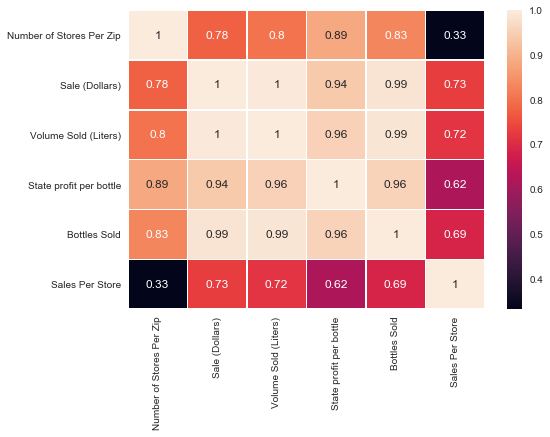

In [114]:
#creo al mappa di calore per capire i valori più correlati
sns.heatmap(zip_frame_fusion.corr(), annot = True, linewidths = 0.5)

Possiamo vedere, dalla mappa di calore appena costruita, come ci sia una forte correlazione delle bottiglie vendute, del volume venduto , delle vendite per negozio con le vendite e con il numero di negozi per zip (la nostra variabile di interesse, che vogliamo predire).

Vediamo invece, che le vendite per negozio non dipendano molto dal numero di negozi per codice postale,mentre le vendite totali sono molto correlate al numero di negozi raggruppati per zip code.

In [32]:
zip_frame.head()

,Number of Stores Per Zip,Zip Code,Sale (Dollars),Volume Sold (Liters),State profit per bottle,Bottles Sold,Sales Per Store
0,44,52402,8.023740e+07,5.490957e+06,2.269103e+06,6127576,1.823577e+06
1,40,52404,3.700606e+07,2.594591e+06,1.433562e+06,3345512,9.251516e+05
2,40,51501,5.640994e+07,3.583675e+06,1.645319e+06,4526042,1.410249e+06
3,35,52001,3.162945e+07,2.080240e+06,1.263518e+06,2578699,9.036984e+05
4,34,52240,7.103721e+07,4.500929e+06,2.010534e+06,5293369,2.089330e+06


In [115]:
#rinomino la colonna vendite come vendite totali

zip_frame.rename(columns={'Sale (Dollars)' : 'Total Sales ($)'}, inplace=True)
zip_frame.head()

,Number of Stores Per Zip,Zip Code,Total Sales ($),Volume Sold (Liters),State profit per bottle,Bottles Sold,Sales Per Store
0,44,52402,8.023740e+07,5.490957e+06,2.269103e+06,6127576,1.823577e+06
1,40,52404,3.700606e+07,2.594591e+06,1.433562e+06,3345512,9.251516e+05
2,40,51501,5.640994e+07,3.583675e+06,1.645319e+06,4526042,1.410249e+06
3,35,52001,3.162945e+07,2.080240e+06,1.263518e+06,2578699,9.036984e+05
4,34,52240,7.103721e+07,4.500929e+06,2.010534e+06,5293369,2.089330e+06


In [116]:
# Re-forming the dataframe to only inlcude the top 100 selling zip codes.

zip_frame = zip_frame.sort_values('Total Sales ($)', ascending=0)
zip_frame


,Number of Stores Per Zip,Zip Code,Total Sales ($),Volume Sold (Liters),State profit per bottle,Bottles Sold,Sales Per Store
46,11,50314,9.944311e+07,5.434182e+06,1.969332e+06,6366175,9.040283e+06
56,10,50320,9.353735e+07,5.487639e+06,1.323686e+06,5948940,9.353735e+06
0,44,52402,8.023740e+07,5.490957e+06,2.269103e+06,6127576,1.823577e+06
4,34,52240,7.103721e+07,4.500929e+06,2.010534e+06,5293369,2.089330e+06
16,23,50266,6.203393e+07,3.729647e+06,1.281872e+06,3434673,2.697127e+06
...,...,...,...,...,...,...,...
343,1,52362,1.577468e+04,8.822000e+02,5.275200e+02,1501,1.577468e+04
384,1,50471,1.503638e+04,1.018300e+03,7.619100e+02,1115,1.503638e+04
445,1,52134,1.497666e+04,1.165500e+03,8.712200e+02,1083,1.497666e+04
423,1,50174,7.864610e+03,5.846700e+02,8.370700e+02,747,7.864610e+03


In [117]:
zip_frame.sort_values('Zip Code', ascending=True).head()

,Number of Stores Per Zip,Zip Code,Total Sales ($),Volume Sold (Liters),State profit per bottle,Bottles Sold,Sales Per Store
285,2,50002,449675.92,28736.61,19388.56,40840,224837.960
130,5,50003,3656359.52,267717.28,110359.09,277885,731271.904
400,1,50005,92768.26,6604.65,2846.46,9742,92768.260
252,2,50006,801509.97,61988.17,47808.26,56146,400754.985
401,1,50008,24329.59,499.53,3710.10,655,24329.590


In [118]:
zip_frame.sort_values('Number of Stores Per Zip', ascending=True).head()

,Number of Stores Per Zip,Zip Code,Total Sales ($),Volume Sold (Liters),State profit per bottle,Bottles Sold,Sales Per Store
471,1,51230,765.91,67.50,42.36,60,765.91
410,1,50107,199586.10,14667.99,6771.52,21583,199586.10
406,1,50071,205026.28,16846.25,5374.84,19771,205026.28
388,1,50535,209982.81,14959.12,7313.70,20075,209982.81
360,1,52352,210335.96,16443.22,6242.01,20084,210335.96



Ora si passa alla realizzazione del modello per la predizione del miglior luogo (zip code) dove aprire un nuovo negozio di liquori

# Regression

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
X = zip_frame[['State profit per bottle', 'Number of Stores Per Zip', 'Volume Sold (Liters)', 'Bottles Sold', 'Sales Per Store']]
y = zip_frame['Total Sales ($)']

lm = LinearRegression()
model = lm.fit(X,y)

In [121]:
predictions = lm.predict(X)
print(predictions)

[ 9.08812666e+07  9.12432609e+07  8.51823603e+07  7.09586578e+07
  5.65144511e+07  6.28401183e+07  5.73706367e+07  5.58028615e+07
  4.98575812e+07  4.65472512e+07  4.81619237e+07  4.56457928e+07
  4.47943667e+07  4.26006747e+07  3.86704227e+07  3.79806289e+07
  3.31689824e+07  3.38290375e+07  3.63129741e+07  2.62690660e+07
  3.33531801e+07  2.99913374e+07  2.97425224e+07  2.67346780e+07
  2.64321277e+07  2.81074435e+07  2.67121904e+07  2.54124811e+07
  2.39637762e+07  2.02386559e+07  2.18686745e+07  1.93308154e+07
  2.14434552e+07  1.98368167e+07  2.01380067e+07  2.09207919e+07
  1.53946482e+07  1.77520181e+07  1.87643250e+07  1.84278910e+07
  1.73576032e+07  1.31795469e+07  1.39988605e+07  1.59133124e+07
  1.66819250e+07  1.36899260e+07  1.59203122e+07  1.56251210e+07
  1.22496897e+07  1.47191545e+07  1.36323436e+07  1.39768380e+07
  1.27325699e+07  1.19314181e+07  1.15143912e+07  1.17731046e+07
  1.11779377e+07  1.19223369e+07  1.30750982e+07  1.03886918e+07
  8.65086644e+06  9.54410

In [122]:
#questo è il numero R^2, riferito alla quantità di varianza spiegata nel modello appena costruito
lm.score(X,y)

0.993827231261511

Il codice sotto riportato utilizza MLR per prevedere le vendite totali utilizzando statsmodel che restituisce un buon summary del modello relizzato. I predittori come il numero di negozi per zip code, i volumi venduti, il profitto dello stato per bottiglia, le bottiglie vendute e le vendite per negozio sono tutti ordinati per codice postale.

In [123]:

X = zip_frame[['State profit per bottle', 'Number of Stores Per Zip', 'Volume Sold (Liters)', 'Bottles Sold', 'Sales Per Store']]
y = zip_frame['Total Sales ($)']
X = sm.add_constant(X) # adding y-intercept


model = sm.OLS(y, X).fit()  ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total Sales ($)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.533e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:10:09   Log-Likelihood:                -7313.6
No. Observations:                 482   AIC:                         1.464e+04
Df Residuals:                     476   BIC:                         1.466e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.202e+05   7.36e+04      1.632      0.103   -2.45e+04    2.65e+05
State profit per bottle     -1.8138      0.568     -3.192      0.002      -2.930      -0.697
Number of Stores Per Zip -1.444e+05    1.9e+04     -7.582      0.000   -1.82e+05   -1.07e+05
Volume Sold (Liters)        12.9651      0.432     30.038      0.000      12.117      13.813
Bottles Sold                 3.9651      0.363     10.910      0.000       3.251       4.679
Sales Per Store              0.0248      0.079      0.315      0.753      -0.130       0.180
==============================================================================
Omnibus:                      272.235   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14018.109
Skew:                           1.689   Prob(JB):                         0.00
Kurtosis:                      29.203   Cond. No.                     2.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sulla base delle statistiche di sintesi del modello di cui sopra, i valori p di 'State profit per bottle' 'Volume venduto', 'Bottiglie vendute' e 'Vendite per negozio' sono tutti fattori statisticamente significativi per la previsione delle vendite totali.



PRIME CONCLUSIONI
-Se il numero di bottiglie vendute aumenta di 1 bottiglia, a parità di altre condizioni, le vendite aumenteranno di 3,96 dollari.
-Se il volume di bottiglie venduto aumenta di 1 litro le vendite aumenteranno di 12,4082 dollari.



TypeError: 'str' object is not callable

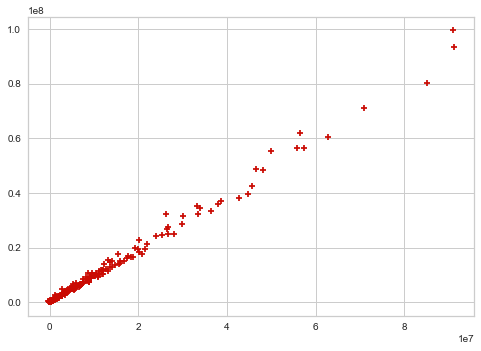

In [124]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10);
plt.xlabel('Predicted Sales')
plt.ylabel("Actual Sales")
plt.show()

In [125]:
print("MSE:", model.mse_model)

MSE: 1.3736339730587468e+16


Training-Test Split 

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import linear_model

Il seguente codice esegue un la validazione tramite il metodo dell'Holdout o Train/Test split

In [127]:
X = zip_frame[['State profit per bottle', 'Number of Stores Per Zip', 'Volume Sold (Liters)', 'Bottles Sold', 'Sales Per Store']]
y = zip_frame['Total Sales ($)']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # test data will be 30% of entire df
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(337, 5) (337,)
(145, 5) (145,)


In [129]:
# fittiamo il modello
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

TypeError: 'str' object is not callable

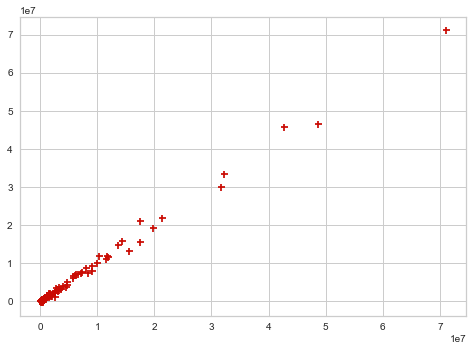

In [130]:
plt.scatter(y_test, predictions, marker='+', color='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")
print("Score:", model.score(X_test, y_test))

In [131]:
print("Score:", model.score(X_test, y_test))

Score: 0.9950996603907266


Il codice sottostante esegue un Train-Test 10 Fold Cross Validation

In [132]:
X = zip_frame[['State profit per bottle', 'Number of Stores Per Zip', 'Volume Sold (Liters)', 'Bottles Sold', 'Sales Per Store']]
y = zip_frame['Total Sales ($)']

In [133]:
#10-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

Cross-validated scores: [0.99279499 0.99286315 0.97961033 0.99122803 0.99606222 0.99771722
 0.99574048 0.98824487 0.98928461 0.99633277]
Average:  0.9919878687134543


TypeError: 'str' object is not callable

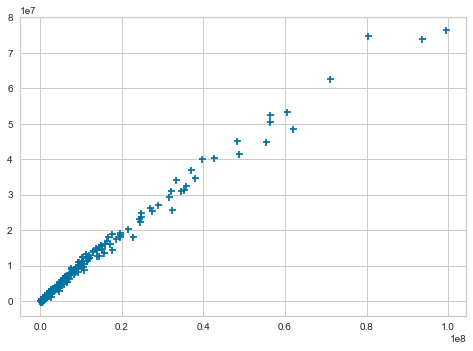

In [134]:
predictions = cross_val_predict(model, X, y, cv=10)
plt.scatter(y, predictions, marker='+')
plt.ylabel('True Sales')
plt.xlabel('Predicted Sales')
plt.title('10-Fold CV Predicted Sales Scatter')

In [135]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.9750868861638873


# Ridge Regression Model

In [136]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn import metrics
import numpy as np

il seguente codice realizza una Ridge Regression 

In [137]:
X= zip_frame[['State profit per bottle', 'Volume Sold (Liters)' , 'Number of Stores Per Zip', 'Bottles Sold', 'Sales Per Store']]
y= zip_frame['Total Sales ($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [138]:
#selezione alpha ottimale per RidgeCV
alpha_range = 10.**np.arange(-2, 3)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [139]:
# Run Ridge regression 
ridgereg = Ridge(alpha=0.01, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1008545.5296931164


In [140]:
# esaminando i coefficienti
rc = ridgeregcv.coef_
print(rc)

[ 1.18229587e+00  1.01612460e+01 -1.82324166e+05  5.54660638e+00
  1.99213590e-01]


In [141]:
print(X.columns, rc)

Index(['State profit per bottle', 'Volume Sold (Liters)',
       'Number of Stores Per Zip', 'Bottles Sold', 'Sales Per Store'],
      dtype='object') [ 1.18229587e+00  1.01612460e+01 -1.82324166e+05  5.54660638e+00
  1.99213590e-01]


TypeError: 'str' object is not callable

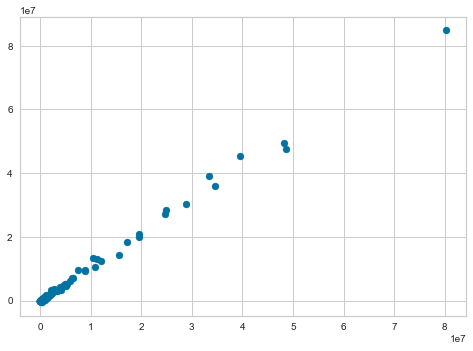

In [142]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Ridge Regression Predictor of Future Sales', fontsize='x-large')

# Lasso Regression Model

In [143]:
from sklearn.linear_model import Lasso, LassoCV

il seguente codice realizza una Lasso Regression 

In [144]:
X= zip_frame[['State profit per bottle', 'Number of Stores Per Zip', 'Volume Sold (Liters)', 'Bottles Sold', 'Sales Per Store']]
y= zip_frame['Total Sales ($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [145]:
# selezione di alpha ottimale con LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

1552.3553768130378

In [146]:
# esaminando i coefficienti
lc = lassoregcv.coef_
print(X.columns, lc)

Index(['State profit per bottle', 'Number of Stores Per Zip',
       'Volume Sold (Liters)', 'Bottles Sold', 'Sales Per Store'],
      dtype='object') [-9.29517385e-01 -1.35807071e+05  1.41089382e+01  2.25956760e+00
  4.30773059e-01]


In [147]:
# fit del modello usando il paramtetro alfa individuato 
y_pred = lassoregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1169097.77800607


In [148]:
lassoreg = Lasso(alpha=135.61, normalize=True)
lassoreg.fit(X_train, y_train)

Lasso(alpha=135.61, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

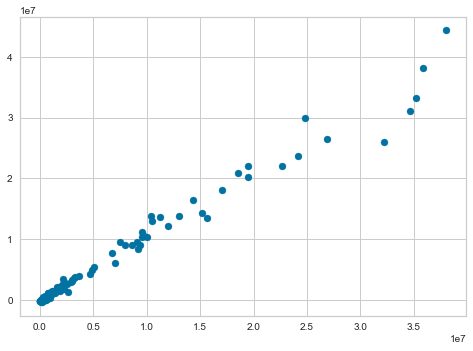

In [149]:
plt.scatter(y_test, y_pred)

Sulla base dei predittori e dei vari modelli che sono stati formati, si può concludere che le bottiglie vendute, il numero di punti vendita per codice postale, il volume venduto, la media delle vendite per punto vendita in ogni codice postale sono fortemente correlati alle vendite totali. Tutti e quattro questi predittori sono stati presi in considerazione per prevedere le vendite totali. Particolari codici di avviamento postale per la costruzione di futuri negozi di liquori saranno scelti successivamente.

### Conclusioni:
tra i metodi visti la RIDGE REGRESSION è il modello migliore considerano i  predittori di interesse. A questo punto analizziamo i coefficenti del ridge regression: 

State profit per bottle: 1.18229587e+00 = 1,18
Volume sold: 1.01612460e+01 = 10.16
Number of Stores per ZIP: -1.82324166e+05 = -182324.16
Bottles sold: 5.54660638e+00 = 5.546
Sales per store: 1.99213590e-01 = 0.199

Questi coefficienti rappresentano la forza e la direzione dell'influenza che il predittore ha sulle vendite totali. Come dimostrato, se il numero di negozi in ogni codice di avviamento postale aumenta di una unità, le Vendite Totali per ogni negozio in quel codice di avviamento postale diminuiscono enormemente. In altre parole, man mano che un numero maggiore di concorrenti (negozi di liquori) si aggiunge al campo, i profitti per ogni concorrente esistente diminuiscono. Sulla base di questi predittori e coefficienti, quattro codici di avviamento postale in particolare sono stati ristretti come le migliori posizioni per aprire un futuro negozio di liquori. 
I codici di avviamento postale scelto sono: 52314, 52401, 50312, 52403. 
Rappresentano codici postali dove non ci sono molti negozi e quindi con pochi concorrenti in zona e le bottiglie vendute e il volume venduto è abbastanza alto, in accordo ai coefficienti trovati.


## Analisi degli Zip Code scelti

In [154]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month,year,State profit per bottle
0,INV-00020100009,2016-08-29,4256,Fareway Stores #912 / Sioux Center,115 1st Ave NW,Sioux Center,51250,POINT (-96.176959 43.078003),84.0,SIOUX,...,750,8.66,12.99,6,12.99,4.50,1.18,8,2016,4.33
1,INV-00067000040,2016-08-31,4588,Sam's Mini Mart / Sioux City,923 W 7TH ST,Sioux City,51103,POINT (-96.419074 42.503495),97.0,WOODBURY,...,375,2.74,4.11,1,98.64,0.37,0.09,8,2016,1.37
3,INV-00030600017,2016-08-30,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 Blairs Ferry Road NE,Cedar Rapids,52402,POINT (-91.668909 42.034799),57.0,LINN,...,750,32.48,48.72,3,48.72,2.25,0.59,8,2016,16.24
4,S33682700006,2016-08-01,4967,Jeff's Market / Blue Grass,"102, W Mayne St",Blue Grass,52726,POINT (-90.766126 41.509119),82.0,Scott,...,600,7.12,10.68,1,10.68,0.60,0.16,8,2016,3.56
5,INV-00025700015,2016-08-30,4829,Central City 2,1501 Michigan Ave,Des Moines,50314,POINT (-93.613739 41.60572),77.0,POLK,...,750,8.26,12.39,1,148.68,0.75,0.19,8,2016,4.13


In [158]:
primo_zip=df['Zip Code'] == '52314'
zip1=df[primo_zip]
# zip1.head()
zip1['Category Name'].value_counts()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month,year,State profit per bottle
421,S33659600004,2016-08-01,5102,Wilkie Liquors,724 1st St SE,Mount Vernon,52314,POINT (-91.410401 41.918328),57.0,Linn,...,750,14.17,21.26,6,127.56,4.5,1.19,8,2016,7.09
1155,INV-00010000022,2016-08-29,5102,Wilkie Liquors,724 1st St SE,Mount Vernon,52314,POINT (-91.410401 41.918328),57.0,LINN,...,1000,18.82,28.23,2,338.76,2.0,0.52,8,2016,9.41
3320,S33673400020,2016-08-01,3829,Gary's Foods / Mt Vernon,715 1st Ave S,Mount Vernon,52314,POINT (-91.422487 41.916708),57.0,Linn,...,750,8.26,12.39,6,74.34,4.5,1.19,8,2016,4.13
4013,S33673400025,2016-08-01,3829,Gary's Foods / Mt Vernon,715 1st Ave S,Mount Vernon,52314,POINT (-91.422487 41.916708),57.0,Linn,...,750,6.83,10.25,4,41.00,3.0,0.79,8,2016,3.42
4556,S33673400024,2016-08-01,3829,Gary's Foods / Mt Vernon,715 1st Ave S,Mount Vernon,52314,POINT (-91.422487 41.916708),57.0,Linn,...,750,6.83,10.25,4,41.00,3.0,0.79,8,2016,3.42


In [159]:
zip1['Category Name'].value_counts()

CANADIAN WHISKIES                       6511
STRAIGHT BOURBON WHISKIES               5158
AMERICAN VODKAS                         4949
VODKA 80 PROOF                          4543
TEQUILA                                 4386
                                        ... 
AMERICAN VODKA                             9
AMARETTO - IMPORTED                        3
SCHNAPPS - IMPORTED                        2
IMPORTED DISTILLED SPIRITS SPECIALTY       1
COCKTAILS / RTD                            1
Name: Category Name, Length: 98, dtype: int64

In [ ]:
primo_zip=df['Zip Code'] == '52314'
zip1=df[primo_zip]
zip1['Category Name'].value_counts() 

In [160]:
secondo_zip=df['Zip Code'] == '52401'
zip2=df[secondo_zip]
zip2['Category Name'].value_counts()

STRAIGHT BOURBON WHISKIES     5457
CANADIAN WHISKIES             5055
AMERICAN VODKAS               4526
VODKA 80 PROOF                3515
IMPORTED SCHNAPPS             2961
                              ... 
DELISTED ITEMS                   3
PEACH BRANDIES                   3
HIGH PROOF BEER - AMERICAN       2
IMPORTED GINS                    2
OTHER PROOF VODKA                1
Name: Category Name, Length: 104, dtype: int64

In [161]:
terzo_zip=df['Zip Code'] == '50312'
zip3=df[terzo_zip]
zip3['Category Name'].value_counts()


AMERICAN VODKAS                 8520
STRAIGHT BOURBON WHISKIES       6120
CANADIAN WHISKIES               5132
VODKA 80 PROOF                  4359
SCOTCH WHISKIES                 3441
                                ... 
AMERICAN CORDIALS & LIQUEURS       4
LOW PROOF VODKA                    2
TROPICAL FRUIT SCHNAPPS            1
AMERICAN VODKA                     1
STRAWBERRY SCHNAPPS                1
Name: Category Name, Length: 98, dtype: int64

In [162]:
# quarto_zip=df[df['Zip Code'] == 52403]
# quarto_zip['Category Name'].value_counts()

quarto_zip=df['Zip Code'] == '52403'
zip4=df[quarto_zip]
zip4['Category Name'].value_counts()

VODKA 80 PROOF                          7633
AMERICAN VODKAS                         7521
CANADIAN WHISKIES                       7344
STRAIGHT BOURBON WHISKIES               6846
SPICED RUM                              4326
                                        ... 
AMERICAN DISTILLED SPIRITS SPECIALTY       3
JAPANESE WHISKY                            2
IOWA DISTILLERY WHISKIES                   1
DELISTED ITEMS                             1
SPEARMINT SCHNAPPS                         1
Name: Category Name, Length: 100, dtype: int64